In [1]:
import get_initialization_cond as init 
import optimization_SPDC as opt
import jax.scipy.optimize as jax_opt
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Np = 0.02
# higher N and wf+wi makes less unstable pump... need to see if N or wf+wi influences more
N = 801
wi = -10
wf = 10
x = np.linspace(wi, wf, N)
w = np.linspace(2*wi, 2*wf, 2*N)
# get the group velocities for all modes
vp = 0.1
l = 1
# For an unstable pump, just change amplitude to 0.2 and width to 0.2 at N = 1
hermite_init_params = [1, 0.05, 0.5, jnp.pi/5]
cst_init_params = [0.1]
alpha, G, H = init.get_constants(vp, l, wi, wf, Np, N = N)
# get the initialization seeds
initial_value_gauss = jnp.array([0.5, 1., 2*jnp.pi/7])
arbitrary_seed_hermite_order_1 = init.get_initialization_array(hermite_init_params, vp, l, wi, wf, Np, method='hermite', N = N)
phi = 2*np.pi*np.random.random()
y_N = 1

In [4]:
unstable_init_hermite_params = [1, 1, 1, jnp.pi/5]
initial_unstable_arbitrary_seed = init.get_initialization_array(unstable_init_hermite_params, vp, l, wi, wf, Np, method = "hermite", N = N)
unstable_opt_arbitrary_pump = (jax_opt.minimize(opt.get_loss, initial_unstable_arbitrary_seed, args = (N, alpha, G, H, l, y_N), method="BFGS")).x
unstabl_opt_arbitrary_complex_pump = opt.get_complex_array(unstable_opt_arbitrary_pump)

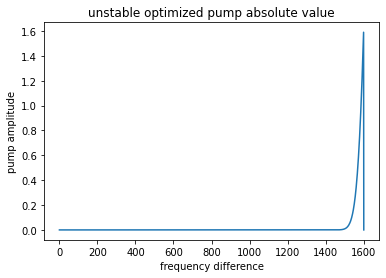

In [5]:
plt.title("unstable optimized pump absolute value")
plt.xlabel("frequency difference")
plt.ylabel("pump amplitude")
plt.plot(np.abs(unstabl_opt_arbitrary_complex_pump))

In [8]:
print("Schmidt number: ", opt.get_observables(unstable_opt_arbitrary_pump, N, alpha, G, H, l)[1])

Schmidt number:  1.0000105
